Saving chup-anh-san-pham-chimkudo-studio63 - Copy.jpg to chup-anh-san-pham-chimkudo-studio63 - Copy.jpg
Saving chup-anh-san-pham-chimkudo-studio63.jpg to chup-anh-san-pham-chimkudo-studio63 (4).jpg


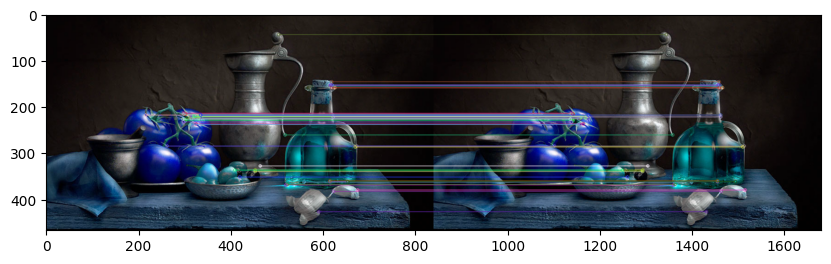

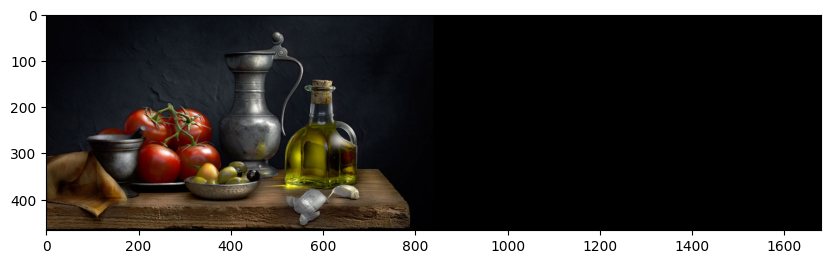

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import io

def upload_images():
    uploaded = files.upload()
    return uploaded


def load_image(image_path):
    img = cv2.imdecode(np.frombuffer(image_path, np.uint8), cv2.IMREAD_COLOR)
    return img

def find_matching_points(img1, img2):
    orb = cv2.ORB_create()
    kp1, des1 = orb.detectAndCompute(img1, None)
    kp2, des2 = orb.detectAndCompute(img2, None)

    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)

    matches = sorted(matches, key = lambda x: x.distance)

    return kp1, kp2, matches


def draw_matches(img1, img2, kp1, kp2, matches):
    img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    plt.figure(figsize=(10, 5))
    plt.imshow(img_matches)
    plt.show()

def stitch_images(img1, img2, kp1, kp2, matches):
    src_pts = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

    H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

    height, width = img2.shape[:2]
    result = cv2.warpPerspective(img1, H, (width + img1.shape[1], height))
    result[0:img2.shape[0], 0:img2.shape[1]] = img2

    return result

def main():

    uploaded = upload_images()


    if len(uploaded) < 2:
        print("Bạn cần tải lên ít nhất 2 ảnh.")
        return


    img1_path = list(uploaded.keys())[0]
    img2_path = list(uploaded.keys())[1]

    img1 = load_image(uploaded[img1_path])
    img2 = load_image(uploaded[img2_path])

    if img1 is None or img2 is None:
        print("Không thể load một hoặc cả hai ảnh. Hãy kiểm tra lại ảnh!")
        return

    kp1, kp2, matches = find_matching_points(img1, img2)


    draw_matches(img1, img2, kp1, kp2, matches)


    stitched_image = stitch_images(img1, img2, kp1, kp2, matches)

    plt.figure(figsize=(10, 5))
    plt.imshow(cv2.cvtColor(stitched_image, cv2.COLOR_BGR2RGB))
    plt.show()

if __name__ == "__main__":
    main()
